In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns

In [2]:
def read_textfiles(path):
    poss_columns = ['Lenkradwin', 'Lenkmoment', 'Fahrgeschw', 'Querbeschl', 'Giergeschw', 'Wankwinkel', 'Radius']
    files = sorted(os.listdir(path))
    print("No. of files to be processed are: ", len(files))
    count  = 0
    data = []
    dup_path = path
    for each_file in files:
        dup_path += each_file
#         print(dup_path)
        print(count, end=',')
#         data.append(pd.read_csv(dup_path, sep = '\t', engine = 'python', decimal = ',', skiprows = 40, usecols = poss_columns)[2: ].apply(pd.to_numeric))
        data.append(pd.read_csv(dup_path, sep = '\t', engine = 'python', decimal = ',', skiprows = 40)[2: ].apply(pd.to_numeric))
        count += 1
        dup_path = path
    print("No. of files processed are: ", count)
    return data

In [3]:
file_data = read_textfiles('/home/loki/MAS/R_D/Moses/Full_data/sk_folded/0031678-8801103(001)/')

No. of files to be processed are:  6
0,1,2,3,4,5,No. of files processed are:  6


In [4]:
file_merged_data = np.asarray(pd.concat(file_data))
# row, col = file_merged_data.shape
# sequence = file_merged_data.reshape((row, 1, col))
print(list(file_data[0]))
print(len(list(file_data[0])))

['Lenkradwin', 'Lenkmoment', 'Fahrgeschw', 'Schwimmwin', 'F_Spur_VL', 'F_Spur_VR', 'L�ngsbesch', 'Querbeschl', 'Giergeschw', 'Nickwinkel', 'Wankwinkel', 'Gierwinkel', 'Nickgeschw', 'Wankgeschw', 'Hochbeschl', 'Fahrge_DIS', 'GPS_Status', 'Status_DIS', 'Status_TRK', 'GPS_FMS_St', 'Schwim_MSP', 'Schwim_MHA', 'Radius', 'Fdiff_Spur', 'Lichtschra', 'L�ngengrad', 'Breitengrd', 'H�he', 'Fahrg_NULL', 'LenkgeschM', 'StWhl_Angl', 'StWhl_AnglSpd', 'VehSpd_Disp', 'Odo', 'AirTemp_Outsd_Disp', 'AirTemp_Outsd', 'BrkPdl_Stat', 'Brk_Stat', 'BrkTrq_V2', 'FullBrk_Actv', 'BrkIntrvntn_Actv_ESP', 'ESP_CtrlLmp_Info', 'VehAccel_X_V2', 'VehAccel_X_Offset', 'VehAccel_Y_V2', 'VehAccel_Y_Offset', 'VehYawRate_Raw', 'VehYawRateOffset_V2', 'WhlRPM_FL', 'WhlRPM_FR', 'WhlRPM_RL', 'WhlRPM_RR', 'AccelPdlPosn_Raw', 'AccelPdlPosn', 'KickDnSw_Psd', 'EngRPM', 'TankLvl', 'TankLvl_Disp_V2', 'SupBat_Volt', 'SupBat_Curr', 'StW_Trq_EPS', 'EPS_FtWhlAngl', 'EPS_FtWhlAngl_Offset']
63


In [5]:
removable_columns = ['L�ngsbesch', 'GPS_Status', 'Status_DIS', 'Status_TRK', 'GPS_FMS_St','Breitengrd', 'L�ngengrad', 
                     'Breitengrd', 'H�he', 'Fahrg_NULL', 'StWhl_AnglSpd', 'Odo', 'AirTemp_Outsd_Disp', 'AirTemp_Outsd',
                     'BrkPdl_Stat', 'Brk_Stat', 'FullBrk_Actv', 'BrkIntrvntn_Actv_ESP', 'ESP_CtrlLmp_Info',
                     'AccelPdlPosn_Raw', 'AccelPdlPosn', 'KickDnSw_Psd',  'TankLvl', 'TankLvl_Disp_V2', 'SupBat_Volt', 
                     'SupBat_Curr', 'StW_Trq_EPS', 'EPS_FtWhlAngl', 'EPS_FtWhlAngl_Offset', 'VehAccel_X_Offset',
                      'VehYawRateOffset_V2', 'BrkTrq_V2']

In [6]:
for each_file in range(len(file_data)):
    file_data[each_file] = file_data[each_file].drop(columns=removable_columns)

In [7]:
file_merged_data = np.asarray(pd.concat(file_data))
# row, col = file_merged_data.shape
# sequence = file_merged_data.reshape((row, 1, col))
print(list(file_data[0]))
print(len(list(file_data[0])))

['Lenkradwin', 'Lenkmoment', 'Fahrgeschw', 'Schwimmwin', 'F_Spur_VL', 'F_Spur_VR', 'Querbeschl', 'Giergeschw', 'Nickwinkel', 'Wankwinkel', 'Gierwinkel', 'Nickgeschw', 'Wankgeschw', 'Hochbeschl', 'Fahrge_DIS', 'Schwim_MSP', 'Schwim_MHA', 'Radius', 'Fdiff_Spur', 'Lichtschra', 'LenkgeschM', 'StWhl_Angl', 'VehSpd_Disp', 'VehAccel_X_V2', 'VehAccel_Y_V2', 'VehAccel_Y_Offset', 'VehYawRate_Raw', 'WhlRPM_FL', 'WhlRPM_FR', 'WhlRPM_RL', 'WhlRPM_RR', 'EngRPM']
32


## PCA 

In [8]:
## Standardize the data
np_data = file_data[0].to_numpy()
np_data_std = (np_data-np.mean(np_data, axis = 0))/np.std(np_data, axis = 0)
print(np_data)
print(np_data_std)
# print(np.mean(np_data, axis = 0))
# print(np.std(np_data, axis = 0))

[[6.14131160e+01 1.38521700e+00 4.83830300e+00 ... 3.64941600e+01
  3.79939200e+01 7.73907120e+02]
 [6.15733320e+01 1.40200200e+00 4.89170600e+00 ... 3.64941600e+01
  3.79939200e+01 7.73907120e+02]
 [6.15046680e+01 1.43099400e+00 4.83067400e+00 ... 3.64941600e+01
  3.84938400e+01 7.73907120e+02]
 ...
 [9.09386360e+01 4.29663400e+00 6.48327590e+01 ... 5.16042420e+02
  5.29540260e+02 2.23698153e+03]
 [9.06868680e+01 4.28137500e+00 6.48327590e+01 ... 5.16042420e+02
  5.29540260e+02 2.23998117e+03]
 [9.06868680e+01 4.31341900e+00 6.48251300e+01 ... 5.13042900e+02
  5.30040180e+02 2.23898129e+03]]
[[-1.17777755 -1.14773963 -1.54981022 ... -1.55011842 -1.55376825
  -1.47619064]
 [-1.15593153 -1.130787   -1.54682857 ... -1.55011842 -1.55376825
  -1.47619064]
 [-1.16529411 -1.10150545 -1.55023617 ... -1.55011842 -1.55035658
  -1.47619064]
 ...
 [ 2.8481306   1.79275394  1.79985902 ...  1.84377248  1.80075494
   2.02830597]
 [ 2.81380115  1.77734255  1.79985902 ...  1.84377248  1.80075494
   2.

In [9]:
## Obatain eigenvalues and eigenvectors from covariance matrix
cov_matrx = (np_data_std-np.mean(np_data_std, axis =0)).T.dot(np_data_std-np.mean(np_data_std, axis =0)) / (np_data_std.shape[0]-1)
print(cov_matrx.shape)
print(cov_matrx)

(32, 32)
[[1.00007988 0.9669819  0.93846921 ... 0.9408424  0.93906904 0.91006088]
 [0.9669819  1.00007988 0.9498829  ... 0.95098945 0.9502719  0.89402466]
 [0.93846921 0.9498829  1.00007988 ... 0.99994814 0.99997629 0.93864958]
 ...
 [0.9408424  0.95098945 0.99994814 ... 1.00007988 1.00004455 0.93932414]
 [0.93906904 0.9502719  0.99997629 ... 1.00004455 1.00007988 0.93876111]
 [0.91006088 0.89402466 0.93864958 ... 0.93932414 0.93876111 1.00007988]]


In [10]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrx)
print(eigen_vals.shape)
print(eigen_vecs.shape)
print()
print("Eigen Values")
print(eigen_vals)
print()
print("Eigen vectors")
print(eigen_vecs)

(32,)
(32, 32)

Eigen Values
[2.14410414e+01 1.62597322e+00 1.41770552e+00 1.02483525e+00
 9.97085857e-01 9.77721648e-01 8.33088671e-01 7.20650882e-01
 6.06606307e-01 4.40449527e-01 4.26853715e-01 2.30453663e-01
 1.51995902e-01 6.10185832e-02 1.77395173e-02 1.51678226e-02
 6.67576468e-03 4.86494014e-03 1.50714217e-03 5.67537956e-04
 1.57456961e-04 1.09794091e-04 8.11917979e-05 3.87494717e-05
 2.29396395e-05 1.92960184e-05 1.22988745e-05 1.54980824e-05
 1.59762446e-05 2.44266951e-08 1.22647659e-07 0.00000000e+00]

Eigen vectors
[[-2.10264676e-01 -1.61623894e-02  1.03310390e-01 ...  1.96595299e-05
   1.67766917e-04  0.00000000e+00]
 [-2.10744780e-01 -3.91944536e-02  2.12317637e-02 ...  2.16202993e-06
   2.39536305e-05  0.00000000e+00]
 [-2.13243481e-01  2.56781279e-02 -9.95859468e-02 ...  4.49256047e-06
   1.29575951e-03  0.00000000e+00]
 ...
 [-2.13436563e-01  2.62820307e-02 -9.66791426e-02 ...  6.94585202e-04
   2.93201047e-04  0.00000000e+00]
 [-2.13302642e-01  2.64263320e-02 -1.00454

In [11]:
## sort eigen values and corresponding eigen vectors in descending order
eigen_tuples = [(eigen_vals[idx], eigen_vecs[:, idx]) for idx in range(len(eigen_vals))]
eigen_tuples.sort(key = lambda x:x[0], reverse=True)
print("Eigen values: ")
for each_tuple in eigen_tuples:
    print(each_tuple[0], end=' , ')

Eigen values: 
21.441041413048453 , 1.6259732223371501 , 1.4177055243135863 , 1.02483524813717 , 0.9970858573536564 , 0.9777216479867555 , 0.8330886709884422 , 0.7206508821928237 , 0.6066063066230939 , 0.44044952720322733 , 0.4268537148413356 , 0.23045366265103553 , 0.15199590209217295 , 0.061018583201294635 , 0.0177395173246357 , 0.015167822625500984 , 0.0066757646796072965 , 0.004864940141339991 , 0.001507142168743547 , 0.0005675379556474336 , 0.0001574569605705247 , 0.00010979409146632734 , 8.119179788186129e-05 , 3.8749471715227586e-05 , 2.2939639468861467e-05 , 1.9296018432708755e-05 , 1.5976244644463403e-05 , 1.549808242990279e-05 , 1.2298874472398878e-05 , 1.226476590288179e-07 , 2.4426695127017173e-08 , 0.0 , 

In [12]:
## Explained variance for finding the select the required Principal Components
eigen_vals_sum = sum(eigen_vals)
print("Eigen values sum: \n", eigen_vals_sum)
exp_variance = [(eigen_val*100)/eigen_vals_sum for eigen_val in sorted(eigen_vals, reverse=True)]
cum_exp_variance = np.cumsum(exp_variance)
print()
print("Explained variance: \n", exp_variance)
print()
print("Cumulative variance: \n", cum_exp_variance)

Eigen values sum: 
 31.002476236121108

Explained variance: 
 [69.15912538646641, 5.24465597506925, 4.572878351767953, 3.305656104150579, 3.2161490900263887, 3.153688887752805, 2.6871681624508668, 2.324494587800669, 1.9566382440004404, 1.4206914436404208, 1.3768374874004634, 0.7433395348676473, 0.4902701994980708, 0.19681841778238876, 0.057219678807357066, 0.048924552058292985, 0.021533004746986426, 0.015692101831762166, 0.004861360612826048, 0.0018306213714186896, 0.0005078851101160461, 0.0003541461999038832, 0.0002618881061741269, 0.0001249883119661275, 7.399292654608796e-05, 6.224024908767413e-05, 5.1532156730917565e-05, 4.998982117385163e-05, 3.9670619787684606e-05, 3.956060093223154e-07, 7.878949713880445e-08, 0.0]

Cumulative variance: 
 [ 69.15912539  74.40378136  78.97665971  82.28231582  85.49846491
  88.6521538   91.33932196  93.66381655  95.62045479  97.04114623
  98.41798372  99.16132326  99.65159345  99.84841187  99.90563155
  99.9545561   99.97608911  99.99178121  99.9966

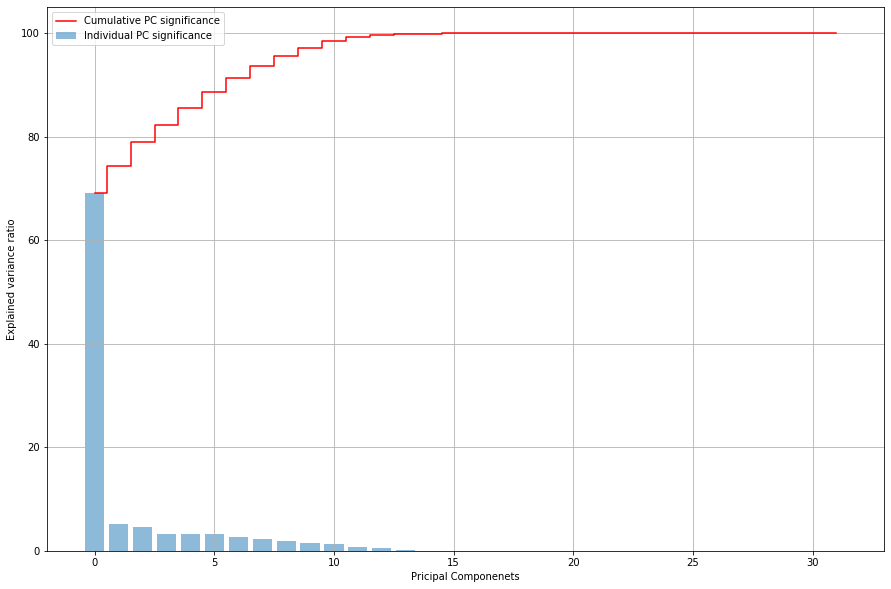

In [13]:
plt.figure(figsize=(15, 10))
plt.bar(range(len(exp_variance)), exp_variance, alpha=0.5, align='center', label = 'Individual PC significance')
plt.step(range(len(cum_exp_variance)), cum_exp_variance, where = 'mid', label = 'Cumulative PC significance', c= 'r')
plt.xlabel("Pricipal Componenets")
plt.ylabel("Explained variance ratio")
plt.gca().legend()
plt.grid()
plt.show()

In [14]:
print(eigen_tuples[3][1])

[ 0.00441837 -0.01094982  0.00593813 -0.00174622  0.03842178  0.0038967
  0.01170729  0.00547143 -0.02496777  0.00477746  0.024315    0.07140249
 -0.56669566  0.01161249  0.00631506 -0.00190917 -0.00182028 -0.00158281
 -0.00689338 -0.66248808 -0.47842374  0.00698383  0.0061836  -0.04775714
  0.00718164  0.          0.00491146  0.00624862  0.00617179  0.00638101
  0.00586516  0.00877423]


In [15]:
## Projection matrix W with eigen vectors with correspondece upto 95%
no_dim = 0
for val in cum_exp_variance:
    if val < 96:
        no_dim += 1
    else:
        break
W_matrix = np.zeros(shape = (len(eigen_vals),1))
for idx, each_tuple in enumerate(eigen_tuples):
    if idx < no_dim:
        W_matrix = np.hstack((W_matrix, each_tuple[1].reshape(len(eigen_vals),1)))
W_matrix = W_matrix[: ,1:]

In [16]:
np_data_std_projected = np_data_std.dot(W_matrix)
print(np_data_std_projected.shape)

(12520, 9)


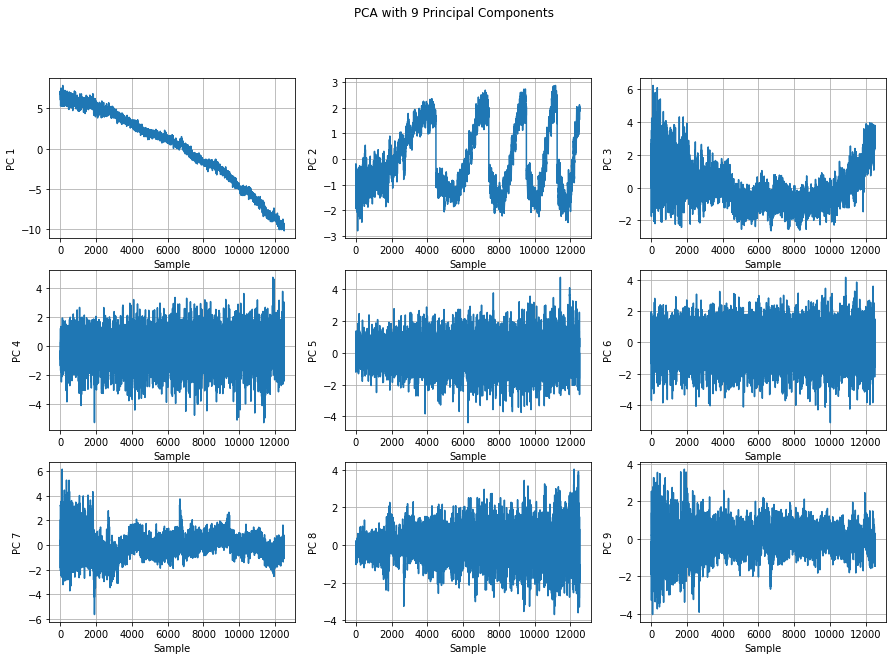

In [17]:
row, col = np_data_std_projected.shape
fig = plt.figure(figsize=(15, 10))
for idx in range(0, col):
    plt.subplot(3, 3, idx+1)
    plt.plot(range(0, row), np_data_std_projected[:, idx])
    plt.xlabel("Sample")
    ylbl = "PC "+str(idx+1)
    plt.ylabel(ylbl)
    plt.grid()
title = "PCA with "+str(no_dim)+" Principal Components"
fig.suptitle(title)
plt.show()

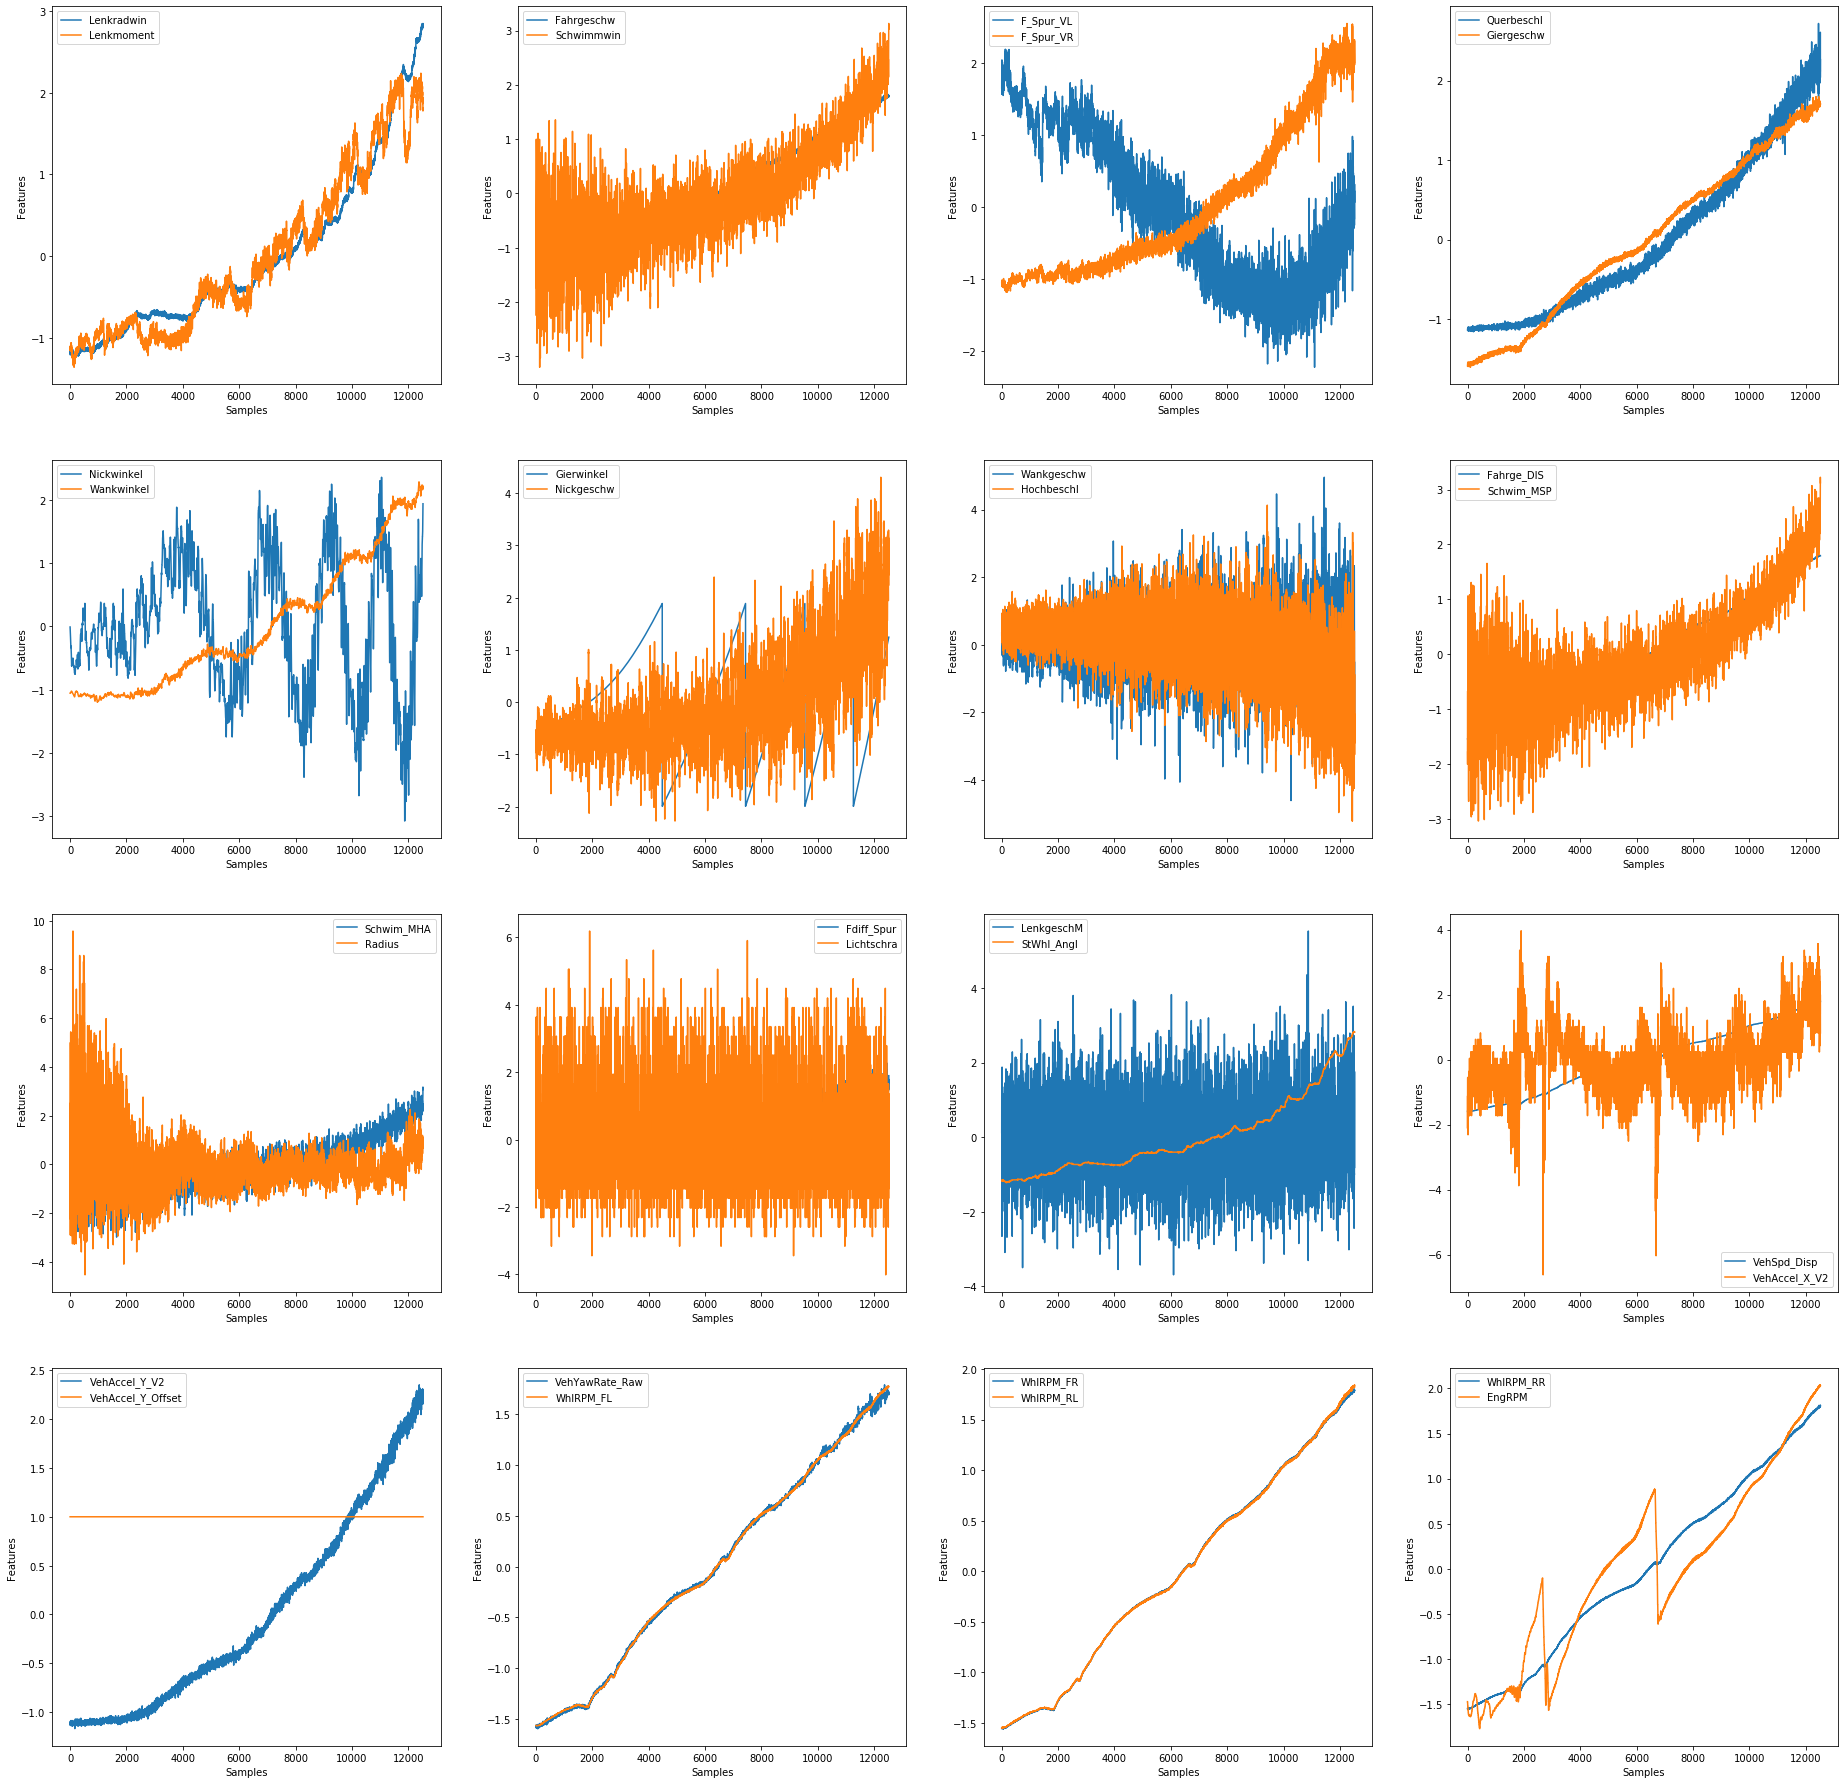

In [18]:
data_columns = list(file_data[0])
plt.figure(figsize=(32,32))
count = 1
for idx in range(0, len(data_columns)-1, 2):
    plt.subplot(4, 4, count)
    count += 1
    plt.plot(range(0, len(np_data_std[:, idx])), np_data_std[:, idx], label=data_columns[idx])
    plt.plot(range(0, len(np_data_std[:, idx+1])), np_data_std[:, idx+1], label=data_columns[idx+1])
    plt.xlabel("Samples")
    plt.ylabel("Features")
    plt.gca().legend()

In [34]:
mean_value = np.mean(np_data_std_projected, axis = 0).reshape((1,9))
standard_dev_value = np.std(np_data_std_projected, axis = 0).reshape((1,9))
print("Mean value: ")
print(mean_value)
print()
print("Standard deviation value: ")
print(standard_dev_value)
print()
threshold = 2*standard_dev_value
print("Thereshold Value: \n", threshold)

Mean value: 
[[-9.28855856e-15  5.37961582e-16 -8.44940021e-16 -1.05701745e-16
  -1.49368005e-16 -5.51032418e-17 -7.44363747e-16 -7.69529985e-17
  -1.83186799e-16]]

Standard deviation value: 
[[4.63026229 1.27508563 1.19062685 1.01230104 0.99850199 0.98875859
  0.91270046 0.84887768 0.77881824]]

Thereshold Value: 
 [[9.26052458 2.55017125 2.38125369 2.02460208 1.99700397 1.97751719
  1.82540092 1.69775537 1.55763649]]


## Application of Density based clustering algorithm to find cluster on original data

In [174]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import kneighbors_graph

In [185]:
A = kneighbors_graph(np_data_std_projected, n_neighbors=2, mode='connectivity', metric='euclidean')
A = A.toarray()
print(np.unique(A, return_counts=True))

KeyboardInterrupt: 

In [163]:
clustering = DBSCAN(eps=6).fit(np_data_std_projected)
labels = clustering.labels_

In [165]:
unique, counts = np.unique(labels, return_counts=True)
print(unique)
print(counts)
print(clustering.get_params())

[0]
[12520]
{'algorithm': 'auto', 'eps': 6, 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'min_samples': 5, 'n_jobs': None, 'p': None}


## Adding random values for anomaly detection:

(12600, 32)


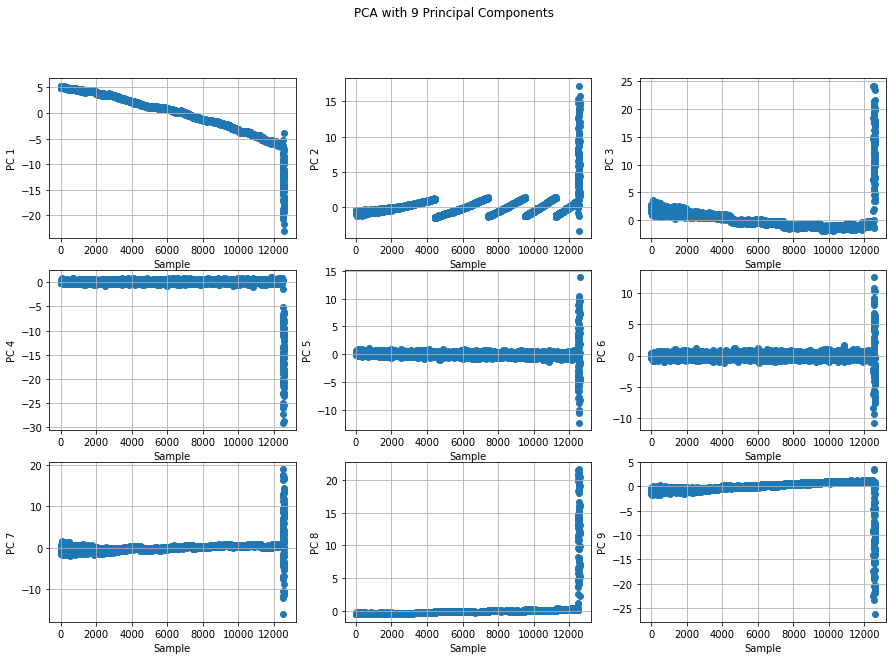

In [169]:
# new_meas = np.zeros((1, 32))
new_meas = np.random.randint(0, 100, (100, 32))
correct_meas = np_data[20:,:]
new_meas = np.concatenate(( correct_meas, new_meas))
print(new_meas.shape)
new_meas = (new_meas-np.mean(new_meas, axis = 0))/np.std(new_meas, axis = 0)
new_meas_projected = new_meas.dot(W_matrix)
row, col = new_meas_projected.shape
fig = plt.figure(figsize=(15, 10))
for idx in range(0, col):
    plt.subplot(3, 3, idx+1)
    plt.scatter(range(0, row), new_meas_projected[:, idx])
    plt.xlabel("Sample")
    ylbl = "PC "+str(idx+1)
    plt.ylabel(ylbl)
    plt.grid()
title = "PCA with "+str(no_dim)+" Principal Components"
fig.suptitle(title)
plt.show()

In [170]:
clustering_new = DBSCAN(eps = 6).fit(new_meas_projected)
new_labels = clustering_new.labels_

In [171]:
new_unique, new_counts = np.unique(new_labels, return_counts=True)
print(new_unique)
print(new_counts)
print(clustering_new.get_params())

[-1  0]
[  100 12500]
{'algorithm': 'auto', 'eps': 6, 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'min_samples': 5, 'n_jobs': None, 'p': None}


In [173]:
print("Indexes where the noise is: ")
for index, value in enumerate(new_labels):
    if value == -1:
        print(index, end=',')

Indexes where the noise is: 
12500,12501,12502,12503,12504,12505,12506,12507,12508,12509,12510,12511,12512,12513,12514,12515,12516,12517,12518,12519,12520,12521,12522,12523,12524,12525,12526,12527,12528,12529,12530,12531,12532,12533,12534,12535,12536,12537,12538,12539,12540,12541,12542,12543,12544,12545,12546,12547,12548,12549,12550,12551,12552,12553,12554,12555,12556,12557,12558,12559,12560,12561,12562,12563,12564,12565,12566,12567,12568,12569,12570,12571,12572,12573,12574,12575,12576,12577,12578,12579,12580,12581,12582,12583,12584,12585,12586,12587,12588,12589,12590,12591,12592,12593,12594,12595,12596,12597,12598,12599,

## Correlogram plot

In [147]:
g = sns.pairplot(file_data[0], kind="reg", markers = '+', height = 11.7, aspect = 0.701)
g.savefig("correlation.png")

MemoryError: In RendererAgg: Out of memory

MemoryError: In RendererAgg: Out of memory

<Figure size 18896.7x26956.8 with 1056 Axes>